# Hands-On Exercise 8.1:
# Generating Association Rules From Transaction Data
***

## Objectives

#### In this exercise, you will perform association rule mining with Python. This exercise allows you to analyze the transaction data by identifying frequently co-occurring items in the data set. The goal is to show you how association rules mining with Python can be used to draw relationships between seemingly unrelated items.

### Overview

You will work on the Online Retail data set. You will:

● Use the Apriori algorithm on the data set to mine association rules <br>
● Evaluate the derived rules through their measures of support, confidence,
and lift

1. ❏ Import the **csv** and **pandas** libraries


In [1]:
import csv
import pandas as pd

2. ❏ Create a sparse matrix from the external dataset *Groceries.csv*

In [2]:
with open("Groceries.csv", 'r') as f:
    reader = csv.reader(f)
    data = list(list(rec) for rec in reader)

3. ❏ Import the **TransactionEncoder** function from **mlxtend.preprocessing**

In [3]:
from mlxtend.preprocessing import TransactionEncoder



,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


4. ❏ Transform the unique labels in the list into a one-hot encoded array and convert them into a dataframe for display

In [21]:
te = TransactionEncoder()
# te_ar = te.fit(data).transform(data)
te_ary = te.fit(data).transform(data)

mystuff = pd.DataFrame(te_ary, columns=te.columns_)
mystuff.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


5. ❏ Import the **apriori** and **association_rules** functions from **mlxtend.frequent_patterns**

In [22]:
from mlxtend.frequent_patterns import apriori, association_rules


6. ❏ Generate itemsets using the **apriori()** function <br><br>
*Hint: Try different values for min_support to see different results. For example, try a min_support of .07 and then try smaller and greater values to see different results*

In [23]:
freq_itemsets = apriori(mystuff, min_support=0.07, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


7. ❏ Use a bar chart to visualize the itemset frequencies<br><br>
*Hint: You may need to set an appropriate value for min_support in step 6, to avoid getting too cluttered a visualization*<br><br>
*Hint2: If the the visualization doesn't appear when you first execute the cell, try re-executing it*

<AxesSubplot:>

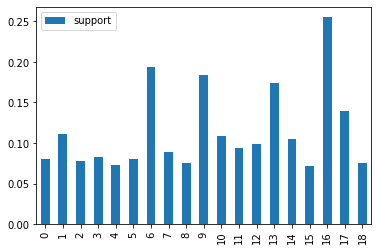

In [24]:
freq_itemsets.plot.bar()

8. ❏ Explore the sizes of the transactions by summing each row (axis=1) and using the **.value_counts()** method to count the number of transactions of each size. The result could then be stored in a dataframe and transposed for easier display

In [25]:
freq_itemsets.sum(axis=1).value_counts()

C:\Users\Evan\AppData\Local\Temp\ipykernel_14836\3900290226.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  freq_itemsets.sum(axis=1).value_counts()


0.080529    1
0.108998    1
0.139502    1
0.255516    1
0.071683    1
0.104931    1
0.174377    1
0.098526    1
0.093950    1
0.183935    1
0.110524    1
0.075648    1
0.088968    1
0.193493    1
0.079817    1
0.072293    1
0.082766    1
0.077682    1
0.074835    1
dtype: int64

9. ❏  Replace **.value_counts()** from the previos step with **.describe()** to generate summary statistics on the transaction sizes

In [26]:
freq_itemsets.sum(axis=1).describe()

C:\Users\Evan\AppData\Local\Temp\ipykernel_14836\4060773820.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  freq_itemsets.sum(axis=1).describe()


count    19.000000
mean      0.114104
std       0.051660
min       0.071683
25%       0.078749
50%       0.093950
75%       0.125013
max       0.255516
dtype: float64

10. ❏ Use the **.sum()** function on the entire dataset to explore the frequency of items across transactions

In [27]:
freq_itemsets.sum(axis=1)

C:\Users\Evan\AppData\Local\Temp\ipykernel_14836\108291581.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  freq_itemsets.sum(axis=1)


0     0.080529
1     0.110524
2     0.077682
3     0.082766
4     0.072293
5     0.079817
6     0.193493
7     0.088968
8     0.075648
9     0.183935
10    0.108998
11    0.093950
12    0.098526
13    0.174377
14    0.104931
15    0.071683
16    0.255516
17    0.139502
18    0.074835
dtype: float64

11. ❏ Divide the summed values in step 10 by the number of rows to explore the proportion of transactions that contain each item<br><br>
*Hint: .shape[0] will return the number of rows*

In [28]:
freq_itemsets.sum(axis=1)/freq_itemsets.shape[0]

C:\Users\Evan\AppData\Local\Temp\ipykernel_14836\1317850106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  freq_itemsets.sum(axis=1)/freq_itemsets.shape[0]


0     0.004238
1     0.005817
2     0.004089
3     0.004356
4     0.003805
5     0.004201
6     0.010184
7     0.004683
8     0.003981
9     0.009681
10    0.005737
11    0.004945
12    0.005186
13    0.009178
14    0.005523
15    0.003773
16    0.013448
17    0.007342
18    0.003939
dtype: float64

12. ❏ Find association rules in the dataset using the **association_rules()** function and a **confidence** metric

In [29]:
confidence = association_rules(freq_itemsets, metric='confidence', min_threshold=0)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013


13. ❏ Sort the rules by **lift**

14. ❏ Find rules that have a chocolate antecedent<br><br>
*Hint: You may need to modify the min_support value in step 6 to a much lower value (eg. min_support=.01), and re-execute steps 6 and 12, in order to generate any rules in this step*